<a href="https://colab.research.google.com/github/cherylktt/tensorflow/blob/main/03_introduction_to_computer_vision_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer vision is the practice of writing algorithms which can discover patterns in visual data, such as the camera of a self-driving car recognising the car in front.

## Get the data

The images are from the [Food 101 dataset](https://www.kaggle.com/datasets/dansbecker/food-101) (101 different classes of food). However, we have [modified](https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb) it to only use 2 classes (pizza & steak).

**Note:** We start with a smaller dataset so we can experiment quickly and figure out what works and doesn't work before scaling up.

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-04-19 07:07:16--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.97.128, 108.177.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   232MB/s    in 0.4s    

2022-04-19 07:07:17 (232 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data. And for a computer vision project, this usually means visualising many samples of your data.

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train

pizza  steak


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [ ]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visualise our images, first let's get the class names programmatically.

In [ ]:
# Get the class names programmatically.
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names from the subdirectories.
# class_names = class_names[1:] to remove .DS_store
print(class_names)

['pizza' 'steak']


In [ ]:
# Let's visualise our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir + "/" + target_class

  # Get a random iamge path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
  
  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

['105910.jpg']
Image shape: (384, 512, 3)


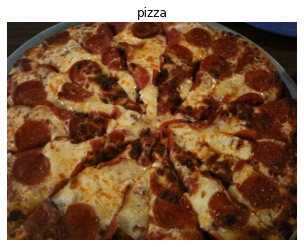

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train",
                        target_class="pizza")

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[ 31,  32,  24],
        [ 29,  30,  22],
        [ 28,  29,  23],
        ...,
        [ 37,  40,  75],
        [ 33,  36,  71],
        [ 25,  28,  63]],

       [[ 33,  34,  26],
        [ 32,  33,  25],
        [ 32,  33,  27],
        ...,
        [ 38,  40,  78],
        [ 37,  40,  75],
        [ 31,  34,  69]],

       [[ 36,  36,  28],
        [ 37,  37,  29],
        [ 38,  37,  32],
        ...,
        [ 40,  42,  80],
        [ 41,  43,  81],
        [ 38,  40,  78]],

       ...,

       [[121,  71,  38],
        [135,  82,  48],
        [133,  81,  42],
        ...,
        [ 26,  21,  17],
        [ 16,  11,   8],
        [ 10,   5,   2]],

       [[112,  62,  25],
        [122,  70,  31],
        [128,  77,  34],
        ...,
        [ 21,  16,  13],
        [ 16,  11,   8],
        [ 12,   7,   4]],

       [[117,  67,  30],
        [120,  68,  28],
        [126,  73,  29],
        ...,
        [ 17,  12,   

**Note:** Many machine learning models, including nerual networks, prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to **scale / normalise** their pixel values by diving the image array by 255 (since 255 is the maximum pixel value).

In [ ]:
# Get all the pixel values between 0 and 1
img/255.

array([[[0.12156863, 0.1254902 , 0.09411765],
        [0.11372549, 0.11764706, 0.08627451],
        [0.10980392, 0.11372549, 0.09019608],
        ...,
        [0.14509804, 0.15686275, 0.29411765],
        [0.12941176, 0.14117647, 0.27843137],
        [0.09803922, 0.10980392, 0.24705882]],

       [[0.12941176, 0.13333333, 0.10196078],
        [0.1254902 , 0.12941176, 0.09803922],
        [0.1254902 , 0.12941176, 0.10588235],
        ...,
        [0.14901961, 0.15686275, 0.30588235],
        [0.14509804, 0.15686275, 0.29411765],
        [0.12156863, 0.13333333, 0.27058824]],

       [[0.14117647, 0.14117647, 0.10980392],
        [0.14509804, 0.14509804, 0.11372549],
        [0.14901961, 0.14509804, 0.1254902 ],
        ...,
        [0.15686275, 0.16470588, 0.31372549],
        [0.16078431, 0.16862745, 0.31764706],
        [0.14901961, 0.15686275, 0.30588235]],

       ...,

       [[0.4745098 , 0.27843137, 0.14901961],
        [0.52941176, 0.32156863, 0.18823529],
        [0.52156863, 0

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically, we need a way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 and 1)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224), # reshape the images
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                                batch_size=32,
                                                target_size=(224, 224),
                                                class_mode="binary",
                                                seed=42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu", #tf.keras.layers.Activations(tf.nn.relu)
                         input_shape=(224, 224, 3)), # 3 is for colour channels
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # this layer is same as above
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data), #len(train_data) = no. of images / batch size
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 26s 249ms/step - loss: 0.5960 - accuracy: 0.6767 - val_loss: 0.4267 - val_accuracy: 0.8240
Epoch 2/5
47/47 [==============================] - 11s 227ms/step - loss: 0.4480 - accuracy: 0.8013 - val_loss: 0.3558 - val_accuracy: 0.8700
Epoch 3/5
47/47 [==============================] - 10s 222ms/step - loss: 0.4176 - accuracy: 0.8220 - val_loss: 0.3793 - val_accuracy: 0.8300
Epoch 4/5
47/47 [==============================] - 10s 223ms/step - loss: 0.3796 - accuracy: 0.8347 - val_loss: 0.3440 - val_accuracy: 0.8480
Epoch 5/5
47/47 [==============================] - 10s 222ms/step - loss: 0.3310 - accuracy: 0.8647 - val_loss: 0.3188 - val_accuracy: 0.8680


It took 87-89s for each epoch to run without GPU and 11-13s with GPU.

In [ ]:
# Get model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

Good read: https://poloclub.github.io/cnn-explainer/

## Using the same model as before

Let's replicate the model we've built in a previous section to see if it works with our image data. The model we're building is from TensorFlow playground.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow playground model.
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 203ms/step - loss: 1.0460 - accuracy: 0.4987 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 10s 203ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 10s 212ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 10s 210ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 10s 204ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
# Get a summary of model 2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20x more parameters than our CNN (model_1), model_2 performs terribily. Let's try to improve it.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 213ms/step - loss: 2.9160 - accuracy: 0.6373 - val_loss: 1.3820 - val_accuracy: 0.6720
Epoch 2/5
47/47 [==============================] - 10s 205ms/step - loss: 0.8667 - accuracy: 0.7193 - val_loss: 0.8953 - val_accuracy: 0.6240
Epoch 3/5
47/47 [==============================] - 10s 203ms/step - loss: 0.8828 - accuracy: 0.7000 - val_loss: 0.6236 - val_accuracy: 0.7760
Epoch 4/5
47/47 [==============================] - 10s 206ms/step - loss: 0.6489 - accuracy: 0.7587 - val_loss: 0.4967 - val_accuracy: 0.7680
Epoch 5/5
47/47 [==============================] - 10s 208ms/step - loss: 0.6110 - accuracy: 0.7620 - val_loss: 0.6156 - val_accuracy: 0.7520


In [ ]:
# Get a summary of model 3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


**Note:** You can think of trainable parameters as **patterns a model can learn from data**. Intuitively, you might think more is better. And in lots of cases, it is. But in this case, the difference here is the two different styles of model we're using. Where a series of dense layers has a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, **a convolutional neural network seeks to sort out and learn the most important patterns in an image**. So even though there are less learnable parameters in our CNN, these are often more helpful in deciphering between different **features** in an image.

## Binary Classification

1. Become one with the data
2. Preprocess the data (prepare it for our model using scaling/normalising)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied

### 1. Become one with the data

['3829392.jpg']
Image shape: (512, 512, 3)
['872094.jpg']
Image shape: (512, 512, 3)


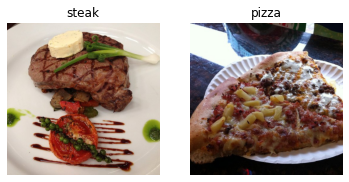

In [ ]:
# Visualise data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data

In [ ]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into **batches**.

A batch is a small subset of data. Rather than looking at all ~10,000 images at one time, a model might only look at 32 at a time. It does this for a couple reasons:

1. 10,000 images (or more) might not fit into the memory of your processor (GPU).
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

In [ ]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, # Target directory of images
                                               target_size=(224, 224), # Target size of images (height, width)
                                               class_mode="binary", # Type of data you're working with
                                               batch_size=32) # Size of minibatches to load data into
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of a train data batch
images, labels = train_data.next() # get the 'next' batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [ ]:
# How many batches are there? Ans: 1500/32 = 46.875
len(train_data)

47

In [ ]:
# Get the first 2 images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [ ]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you set up when beginning a machine learning experiment. As you keep experimenting, you try to beat the baseline.

**Note:** In deep learning, there is almost an infinite amount of architectures you could create. So one of the best ways to get started is to start with something simple and see if it works on your data, and then introduce complexity as required (e.g. look at which current model is performing best in the field for your problem)

In [ ]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# Create the model (this will be our baseline, a 3 layer CNN)
model_4 = Sequential([
  Conv2D(filters=10, # the number of sliding windows across an input (higher = more complex model)
         kernel_size=3, # the size of the sliding window going across an input
         strides=1, # the size of the step the sliding window takes across an input
         padding="valid", # if "same", output shape is same as input shape; if "valid", output shape gets compressed
         activation="relu",
         input_shape=(224, 224, 3)), # input layer (specify input shape)
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  Flatten(),
  Dense(1, activation="sigmoid") # output layler (working with binary classification so only 1 output neuron)
])

Breakdown of Conv2D layer:

* **Filters** - decide how many filters should pass over an input tensor (sliding windows over an image), higher values lead to more complex models (typical values: 10, 32, 64, 128)
* **Kernel size** (also called filter size) - determines the shape of the filters over the output, lower values learn smaller features, higher values learn larger features (typical values: 3, 5, 7)
* **Padding** - pads the target tensor with zeroes if `"same"` to preserve input shape or leaves in the target tensor as is if `"valid"`, lowering output shape (typical values: `"same"` or `"valid"`)
* **Strids** - the number of steps a filter takes across an image at a time, if `strides=1`, a filter moves across an image 1 pixel at a time (typical values: 1(deafult), 2)

For demonstration of the hyperparameters, read the [CNN explainer website](https://poloclub.github.io/cnn-explainer/).

In [ ]:
# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
# Get a summary of model 4
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 4. Fit the model

In [ ]:
# Check the lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [ ]:
# Fit the model
history_4 = model_4.fit(train_data, # this is a combination of labels and sample data
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 13s 251ms/step - loss: 1.6383 - accuracy: 0.6053 - val_loss: 0.5350 - val_accuracy: 0.7080
Epoch 2/5
47/47 [==============================] - 11s 234ms/step - loss: 0.4671 - accuracy: 0.7933 - val_loss: 0.3942 - val_accuracy: 0.8180
Epoch 3/5
47/47 [==============================] - 11s 245ms/step - loss: 0.3757 - accuracy: 0.8393 - val_loss: 0.3557 - val_accuracy: 0.8400
Epoch 4/5
47/47 [==============================] - 11s 233ms/step - loss: 0.2819 - accuracy: 0.8947 - val_loss: 0.3739 - val_accuracy: 0.8480
Epoch 5/5
47/47 [==============================] - 11s 245ms/step - loss: 0.1714 - accuracy: 0.9527 - val_loss: 0.4014 - val_accuracy: 0.8260


In [ ]:
model_1.evaluate(test_data)

16/16 [==============================] - 3s 181ms/step - loss: 0.3188 - accuracy: 0.8680


[0.31879597902297974, 0.8679999709129333]

Our baseline model (model_4) might improve if we add convolutional layers and max pooling layers.

### 5. Evaluating our model

It looks like our model is learning something, let's evaluate it.

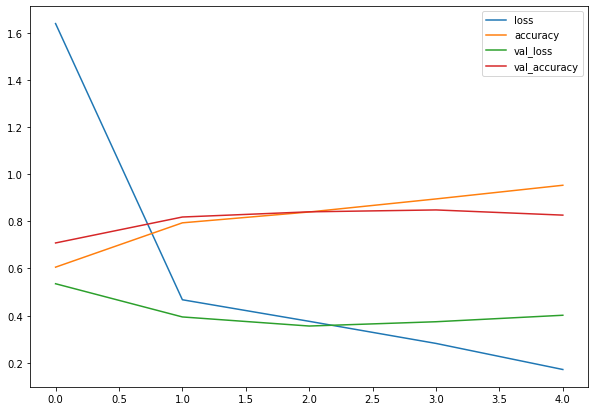

In [ ]:
# Let's plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7))

In [ ]:
# Plot the training and validation curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs did we run for

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure() # create a new figure
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

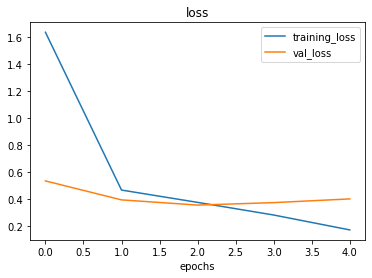

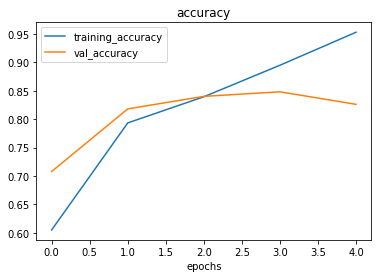

In [ ]:
# Check out the loss and accuracy of model_4
plot_loss_curves(history_4)

>**Note:** When a model's **validation loss starts to increase**, it's likely that the model is **overfitting** the training dataset. This means it's learning the patterns in the training dataset **too well**, and thus the model's ability to generalise to unseen data will be diminished.

>**Note:** Ideally the two loss curves (training and validation) will be very similar to each other (training loss and validation loss decreasing at similar rates). When there are large differences, your model may be **overfitting**.

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:
* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting:
* Add data augmentation
* Add regularisation layers (such as MaxPool2D)
* Add more data

>**Note:** Reducing overfitting is also known as **regularisation**.

#### 1. Add MaxPool2 layers

In [ ]:
# Create the model (this is going to be our new baseline)
model_5 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # default pool_size is 2
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
])

In [ ]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 218ms/step - loss: 0.6797 - accuracy: 0.5773 - val_loss: 0.6293 - val_accuracy: 0.5840
Epoch 2/5
47/47 [==============================] - 10s 214ms/step - loss: 0.5147 - accuracy: 0.7647 - val_loss: 0.3846 - val_accuracy: 0.8340
Epoch 3/5
47/47 [==============================] - 10s 211ms/step - loss: 0.4294 - accuracy: 0.8153 - val_loss: 0.3712 - val_accuracy: 0.8420
Epoch 4/5
47/47 [==============================] - 10s 210ms/step - loss: 0.3897 - accuracy: 0.8307 - val_loss: 0.3342 - val_accuracy: 0.8600
Epoch 5/5
47/47 [==============================] - 10s 215ms/step - loss: 0.3883 - accuracy: 0.8387 - val_loss: 0.3280 - val_accuracy: 0.8780


In [ ]:
# Get a summary of our model with max pooling
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

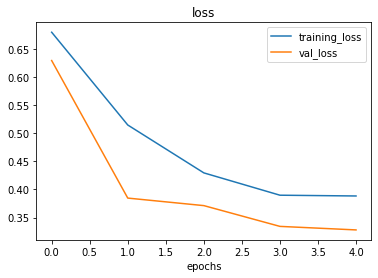

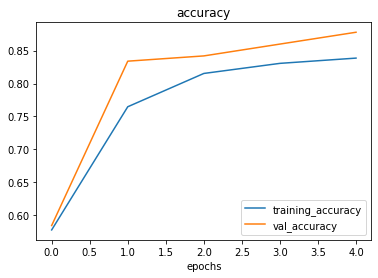

In [ ]:
# Plot loss curves
plot_loss_curves(history_5)

#### 2. Data Augmentation

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2, # how much do you want to rotate an image?
                                             shear_range=0.2, # how much do you want to shear an image?
                                             zoom_range=0.2, # zoom in randomly on an image
                                             width_shift_range=0.2, # move your image around on the x axis
                                             height_shift_range=0.2, # move your image around on the y axis
                                             horizontal_flip=True) # do you want to flip an image?

# Create ImageDataGenerator without data augmentation for training data
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for test data
test_datagen = ImageDataGenerator(rescale=1/255.)

**What is data augmentation?**

Data augmentation is the process of altering our training data, leading it to have more diveristy, and in turn allowing our models to learn more generalisable (hopefully) patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Let's write some code to visualise data augmentation.

In [ ]:
# Import data and augment it from training directory
print("Augmented training data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False) # set shuffle to false for demonstration purposes only

# Create non-augmented train data batches
print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

# Create non-augmented test data batches 
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="binary")

Augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


> **Note:** Data augmentation is usually only performed on the training data. By using `ImageDataGenerator` built-in data augmentation parameters, our images are left as they are in the directories but are modified as they're loaded into the model.

Let's finally visualise some augmented data.

In [ ]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # note: labels aren't augmented, only images

Showing image number: 13


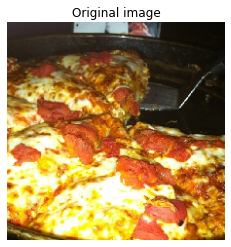

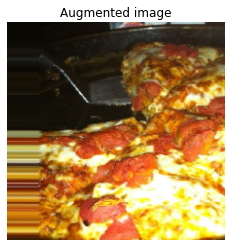

In [ ]:
# Show original image and augmented image
import random
random_number = random.randint(0, 32) # our batch sizes are 32
print(f"Showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

Now that we've seen what augmented training data looks like, let's build a model and see how it learns on augmented data.

In [ ]:
# Create a model to train augmented data
model_6 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
])

# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model with augmented training data
history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 536ms/step - loss: 0.7037 - accuracy: 0.4860 - val_loss: 0.6729 - val_accuracy: 0.5720
Epoch 2/5
47/47 [==============================] - 25s 526ms/step - loss: 0.6940 - accuracy: 0.5207 - val_loss: 0.6638 - val_accuracy: 0.7400
Epoch 3/5
47/47 [==============================] - 27s 584ms/step - loss: 0.6729 - accuracy: 0.6327 - val_loss: 0.5806 - val_accuracy: 0.8040
Epoch 4/5
47/47 [==============================] - 28s 591ms/step - loss: 0.6979 - accuracy: 0.5873 - val_loss: 0.6370 - val_accuracy: 0.6180
Epoch 5/5
47/47 [==============================] - 25s 522ms/step - loss: 0.6826 - accuracy: 0.5667 - val_loss: 0.6250 - val_accuracy: 0.6640


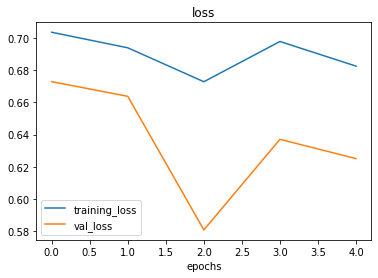

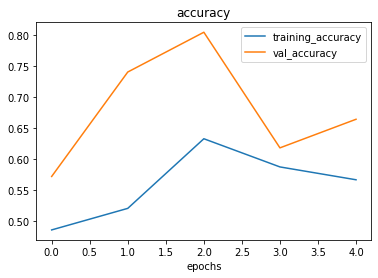

In [ ]:
# Plot training curves of model 6
plot_loss_curves(history_6)

Let's shuffle our augmented training data and train another model (the same as before) on it, and see what happens.

In [ ]:
# Import data and augment it and shuffle from training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode="binary",
                                                                            shuffle=True)

Found 1500 images belonging to 2 classes.


In [ ]:
# Create the model (same as model_6)
model_7 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
])

# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 534ms/step - loss: 0.6021 - accuracy: 0.6733 - val_loss: 0.4477 - val_accuracy: 0.7880
Epoch 2/5
47/47 [==============================] - 25s 535ms/step - loss: 0.4965 - accuracy: 0.7647 - val_loss: 0.3474 - val_accuracy: 0.8540
Epoch 3/5
47/47 [==============================] - 25s 538ms/step - loss: 0.4870 - accuracy: 0.7680 - val_loss: 0.3331 - val_accuracy: 0.8680
Epoch 4/5
47/47 [==============================] - 25s 530ms/step - loss: 0.4647 - accuracy: 0.7853 - val_loss: 0.3343 - val_accuracy: 0.8640
Epoch 5/5
47/47 [==============================] - 25s 525ms/step - loss: 0.4530 - accuracy: 0.7893 - val_loss: 0.3257 - val_accuracy: 0.8560


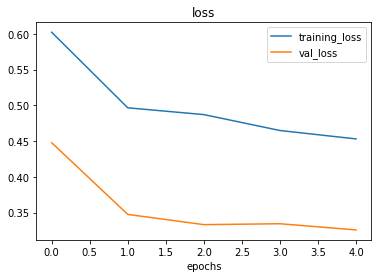

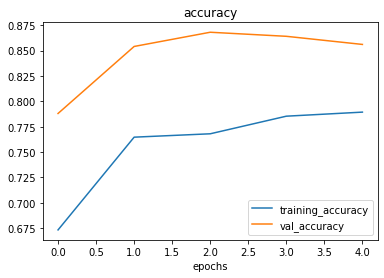

In [ ]:
# Plot the training curve for model_7
plot_loss_curves(history_7)

**Note:** When shuffling training data, the model gets exposed to all different kinds of data during training, thus enabling it to learn features across a wide array of images (in our case, pizza and steak at the same time instead of just pizza then steak).

### 7. Repeat until satisfied

Since we've already beaten our baseline, there are a few thing we could try to continue to improve our model:

* Increase the number of model layers (e.g. add more `Conv2D` / `MaxPool2D` layers)
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data (give the model more opportunities to learn)
* Use **transfer learning** to leverage what another image model has learn and adjust it for our own use case

**Practice:** Recreate the model on the CNN explainer website (same as `model_1`) and see how it performs on augmented shuffled data.

In [ ]:
# Create the model
model_8 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
])

# Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 27s 556ms/step - loss: 0.6039 - accuracy: 0.6513 - val_loss: 0.5068 - val_accuracy: 0.7240
Epoch 2/5
47/47 [==============================] - 31s 668ms/step - loss: 0.5233 - accuracy: 0.7453 - val_loss: 0.4130 - val_accuracy: 0.8180
Epoch 3/5
47/47 [==============================] - 26s 559ms/step - loss: 0.5169 - accuracy: 0.7533 - val_loss: 0.3784 - val_accuracy: 0.8340
Epoch 4/5
47/47 [==============================] - 27s 575ms/step - loss: 0.5097 - accuracy: 0.7693 - val_loss: 0.3784 - val_accuracy: 0.8260
Epoch 5/5
47/47 [==============================] - 26s 553ms/step - loss: 0.4845 - accuracy: 0.7747 - val_loss: 0.3559 - val_accuracy: 0.8460


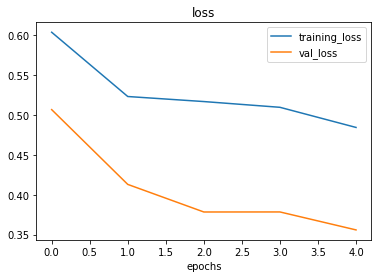

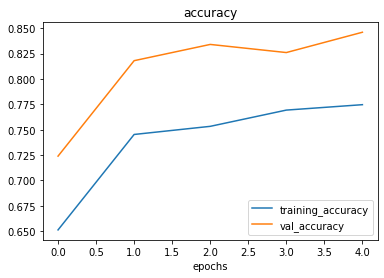

In [ ]:
# Plot the training curves
plot_loss_curves(history_8)

Increase the number of layers in `model_8` to 3

Epoch 1/5
47/47 [==============================] - 27s 566ms/step - loss: 0.6439 - accuracy: 0.6327 - val_loss: 0.5477 - val_accuracy: 0.6960
Epoch 2/5
47/47 [==============================] - 26s 552ms/step - loss: 0.5715 - accuracy: 0.7073 - val_loss: 0.4406 - val_accuracy: 0.8400
Epoch 3/5
47/47 [==============================] - 26s 551ms/step - loss: 0.5286 - accuracy: 0.7293 - val_loss: 0.3883 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 26s 552ms/step - loss: 0.5310 - accuracy: 0.7540 - val_loss: 0.3968 - val_accuracy: 0.8520
Epoch 5/5
47/47 [==============================] - 26s 551ms/step - loss: 0.4914 - accuracy: 0.7600 - val_loss: 0.3982 - val_accuracy: 0.8220


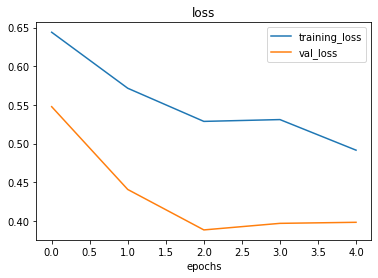

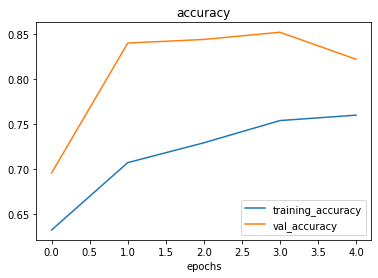

In [ ]:
# Create the model
model_9 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
])

# Compile the model
model_9.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_9 = model_9.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

# Plot training curves
plot_loss_curves(history_9)

> Increasing the number of layers did improve the model.

Increase the number of filters in each convolutional layer of `model_9` to 32

Epoch 1/5
47/47 [==============================] - 32s 631ms/step - loss: 0.6733 - accuracy: 0.6000 - val_loss: 0.5948 - val_accuracy: 0.7240
Epoch 2/5
47/47 [==============================] - 28s 592ms/step - loss: 0.5698 - accuracy: 0.6987 - val_loss: 0.4430 - val_accuracy: 0.8020
Epoch 3/5
47/47 [==============================] - 27s 578ms/step - loss: 0.5158 - accuracy: 0.7420 - val_loss: 0.3462 - val_accuracy: 0.8520
Epoch 4/5
47/47 [==============================] - 27s 576ms/step - loss: 0.4586 - accuracy: 0.7847 - val_loss: 0.3690 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 27s 572ms/step - loss: 0.4556 - accuracy: 0.7860 - val_loss: 0.2731 - val_accuracy: 0.8960


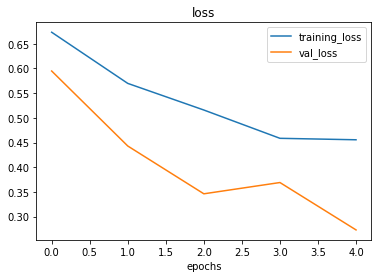

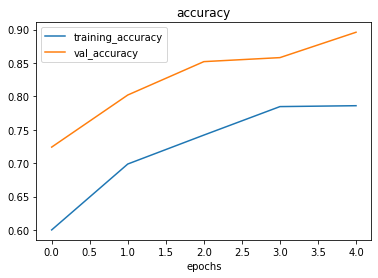

In [ ]:
# Create the model
model_10 = Sequential([
  Conv2D(32, 3, activation="relu", input_shape=(224, 224, 3)),
  Conv2D(32, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(32, 3, activation="relu"),
  Conv2D(32, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(32, 3, activation="relu"),
  Conv2D(32, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
])

# Compile the model
model_10.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_10 = model_10.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

# Plot training curves
plot_loss_curves(history_10)

> Increasing the number of filters did improve the model.

Increase the number of epochs of `model_10` to 10

Epoch 1/10
47/47 [==============================] - 30s 592ms/step - loss: 0.5925 - accuracy: 0.6700 - val_loss: 0.4444 - val_accuracy: 0.7920
Epoch 2/10
47/47 [==============================] - 27s 571ms/step - loss: 0.5521 - accuracy: 0.7280 - val_loss: 0.5121 - val_accuracy: 0.7960
Epoch 3/10
47/47 [==============================] - 27s 574ms/step - loss: 0.5281 - accuracy: 0.7527 - val_loss: 0.4286 - val_accuracy: 0.8480
Epoch 4/10
47/47 [==============================] - 27s 568ms/step - loss: 0.4843 - accuracy: 0.7753 - val_loss: 0.3632 - val_accuracy: 0.8540
Epoch 5/10
47/47 [==============================] - 27s 570ms/step - loss: 0.4859 - accuracy: 0.7807 - val_loss: 0.4006 - val_accuracy: 0.8340
Epoch 6/10
47/47 [==============================] - 27s 573ms/step - loss: 0.4576 - accuracy: 0.7893 - val_loss: 0.3830 - val_accuracy: 0.8240
Epoch 7/10
47/47 [==============================] - 27s 572ms/step - loss: 0.4450 - accuracy: 0.7960 - val_loss: 0.3370 - val_accuracy: 0.8740

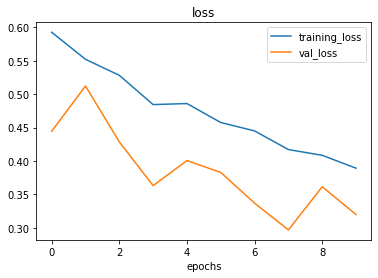

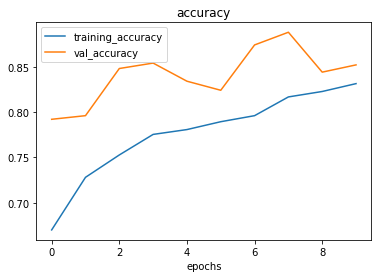

In [ ]:
# Create the model
model_11 = Sequential([
  Conv2D(32, 3, activation="relu", input_shape=(224, 224, 3)),
  Conv2D(32, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(32, 3, activation="relu"),
  Conv2D(32, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(32, 3, activation="relu"),
  Conv2D(32, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
])

# Compile the model
model_11.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_11 = model_11.fit(train_data_augmented_shuffled,
                        epochs=10,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

# Plot training curves
plot_loss_curves(history_11)

> Fitting the data for too long does not improve the model.

Evaluate the models

In [ ]:
loss, accuracy = model_7.evaluate(test_data)
print(f"Accuracy of model 7: {(accuracy*100):.2f}%")

16/16 [==============================] - 3s 210ms/step - loss: 0.3257 - accuracy: 0.8560
Accuracy of model 7: 85.60%


In [ ]:
def evaluate_model(model, x, test_data=test_data):
  """
  Evaluate the loss and accuracy of model x.
  """
  loss, accuracy = model.evaluate(test_data)
  print(f"Model loss on model {x}: {loss}")
  print(f"Model accuracy on model {x}: {(accuracy*100):.2f}%")

In [ ]:
evaluate_model(model_7, 7)

16/16 [==============================] - 4s 273ms/step - loss: 0.3257 - accuracy: 0.8560
Model loss on model 7: 0.3257104456424713
Model accuracy on model 7: 85.60%


In [ ]:
evaluate_model(model_10, 10)

16/16 [==============================] - 4s 230ms/step - loss: 0.2731 - accuracy: 0.8960
Model loss on model 10: 0.2730528712272644
Model accuracy on model 10: 89.60%


**The best model is `model_10`.**

## Making a prediction with our trained model on our own custom data

In [ ]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


--2022-04-19 08:26:42--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.08s   

2022-04-19 08:26:42 (24.7 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



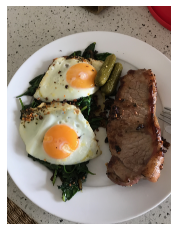

In [ ]:
# View our example image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [ ]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

In [ ]:
steak

array([[[162, 158, 149],
        [163, 159, 150],
        [166, 162, 153],
        ...,
        [136,  17,  23],
        [140,  21,  27],
        [140,  21,  27]],

       [[164, 160, 151],
        [164, 160, 151],
        [164, 160, 151],
        ...,
        [133,  14,  20],
        [134,  15,  21],
        [137,  18,  24]],

       [[166, 162, 153],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [136,  17,  23],
        [134,  15,  21],
        [136,  17,  23]],

       ...,

       [[154, 132, 109],
        [142, 122,  98],
        [101,  80,  59],
        ...,
        [165, 154, 148],
        [152, 141, 135],
        [140, 129, 123]],

       [[141, 119,  95],
        [139, 117,  93],
        [106,  86,  62],
        ...,
        [158, 147, 141],
        [142, 131, 125],
        [138, 127, 121]],

       [[148, 127, 100],
        [149, 127, 103],
        [114,  94,  70],
        ...,
        [153, 142, 136],
        [138, 127, 121],
        [145, 132, 126]]

In [ ]:
expanded_steak = tf.expand_dims(steak, axis=0)

**Note:** When you train a neural network and you want to make a prediction with it on your own custom data, it is important that your custom data is preprocessed into the same format as the data your model was trained on.

In [ ]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshapes it to (img_shape, img_shape, color_channels).
  """
  
  # Read in the image
  img = tf.io.read_file(filename)
  
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)

  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.

  return img

In [ ]:
# Load in and preprocess our custom image
processed_steak = load_and_prep_image("03-steak.jpeg")
processed_steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
pred = model_10.predict(tf.expand_dims(processed_steak, axis=0))
pred

array([[0.7316373]], dtype=float32)

Looks like our custom image is being put through our model, however, it currently outputs a prediction probability, wouldn't it be nice if we could visualise the image as well as the model's prediction?

In [ ]:
# Remind ourselves of our class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
# Index the predicted class by roudning the prediction probability and indexing it on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model and plot the image with the predicted class as the title.
  """

  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediciton
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

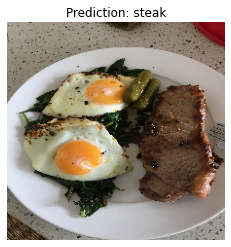

In [ ]:
# Test our model on a custom image
pred_and_plot(model_10, "03-steak.jpeg")

Let's try our model on another image, this time pizza.

--2022-04-19 08:28:24--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.08s   

2022-04-19 08:28:25 (35.6 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



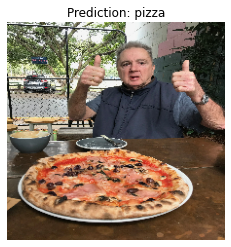

In [ ]:
# Download another test custom iamge and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_10, "03-pizza-dad.jpeg")

## Multi-class Image Classification

We've just been through a bunch of the following steps with a binary classification problem (pizza vs steak), now we're going to step things up a notch with 10 classes of food (multi-class classification).

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat baseline / reduce overfitting)
7. Repeat until satisfied

### 1. Import and become one with the data

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-04-19 08:34:43--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.97.128, 108.177.125.128, 142.250.157.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.97.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  92.0MB/s    in 6.2s    

2022-04-19 08:34:49 (79.8 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os

# Walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.

In [ ]:
# Set up the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
# Let's get the class names without using tensorflow
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['2320477.jpg']
Image shape: (512, 512, 3)


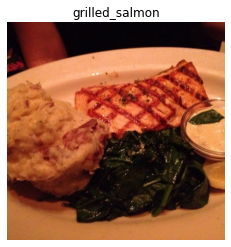

In [ ]:
# Visualise the data
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

### 2. Preprocess the data (prepare it for a model)

In [ ]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode="categorical",
                                               batch_size=32)
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode="categorical",
                                             batch_size=32)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a model (start with a baseline)

Replicate the model from the CNN explainer website.

In [ ]:
# Make the creating of our model a little easier
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# Create a model
model_12 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation="softmax")
])

# Compile the model
model_12.compile(loss="categorical_crossentropy",
                 optimizer=Adam(),
                 metrics=["accuracy"])

### 4. Fit the model

In [ ]:
# Fit the model
history_12 = model_12.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 58s 246ms/step - loss: 1.9418 - accuracy: 0.3132 - val_loss: 1.9285 - val_accuracy: 0.3284
Epoch 2/5
235/235 [==============================] - 59s 249ms/step - loss: 1.6721 - accuracy: 0.4303 - val_loss: 1.9488 - val_accuracy: 0.3064
Epoch 3/5
235/235 [==============================] - 57s 241ms/step - loss: 1.1474 - accuracy: 0.6140 - val_loss: 2.3603 - val_accuracy: 0.2908
Epoch 4/5
235/235 [==============================] - 57s 241ms/step - loss: 0.5373 - accuracy: 0.8240 - val_loss: 3.2680 - val_accuracy: 0.2836
Epoch 5/5
235/235 [==============================] - 57s 242ms/step - loss: 0.1885 - accuracy: 0.9468 - val_loss: 4.7176 - val_accuracy: 0.2544


### 5. Evaluate the model

In [ ]:
# Evaluate on the test data
model_12.evaluate(test_data)

79/79 [==============================] - 15s 184ms/step - loss: 4.7176 - accuracy: 0.2544


[4.717572212219238, 0.25440001487731934]

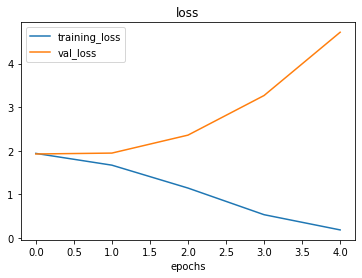

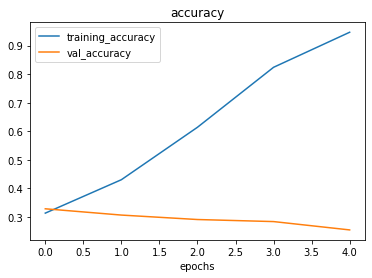

In [ ]:
# Plot the training curves
plot_loss_curves(history_12)

> Our model is **overfitting** the training set quite badly. It is getting great results on the training data, but fails to generalise well to unseen data and performs poorly on the test dataset.

### 6. Adjust different hyperparameters (to beat the baseline / reduce overfitting)

Due to its performance on the training data, it's clear our model is learning something. However, it's not generalising well to unseen data. So, let's try and fix overfitting by:

* **Get more data** - having more data gives a model more opportunity to learn diverse patterns
* **Simplify the model** - if our current model is overfitting the data, it may be too complicated of a model. One way to simplify a model is to: reduce the number of layers or reduce the number of filters in the layers
* **Data augmentation** - data augmentation manipulates the training data in such a way to add more diversity to it (without altering the original data)
* **Use transfer learning** - transfer learning leverages the patterns another model has learned on similar data to your own, and allows you to use those pattenrs on your own dataset.

Ideally, we want to:
* Reduce overfitting (get the train and validation loss curves closer)
* Improve validation accuracy

1. Data Augmentation

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)

In [ ]:
# Import data and augment it from training directory
train_data_augmented = train_datagen_augmented.flow_from_directory(directory=train_dir,
                                                                target_size=(224, 224),
                                                                batch_size=32,
                                                                class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [ ]:
# Create a model to train augmented data
model_13 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation="softmax")
])

# Compile the model
model_13.compile(loss="categorical_crossentropy",
                 optimizer=Adam(),
                 metrics=["accuracy"])

# Fit the model
history_13 = model_13.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 137s 579ms/step - loss: 2.2526 - accuracy: 0.1504 - val_loss: 2.1192 - val_accuracy: 0.2088
Epoch 2/5
235/235 [==============================] - 132s 563ms/step - loss: 2.1324 - accuracy: 0.2249 - val_loss: 2.0250 - val_accuracy: 0.2788
Epoch 3/5
235/235 [==============================] - 134s 569ms/step - loss: 2.0447 - accuracy: 0.2719 - val_loss: 1.8885 - val_accuracy: 0.3512
Epoch 4/5
235/235 [==============================] - 132s 561ms/step - loss: 1.9937 - accuracy: 0.2953 - val_loss: 1.8342 - val_accuracy: 0.3568
Epoch 5/5
235/235 [==============================] - 131s 559ms/step - loss: 1.9468 - accuracy: 0.3188 - val_loss: 1.9192 - val_accuracy: 0.3336


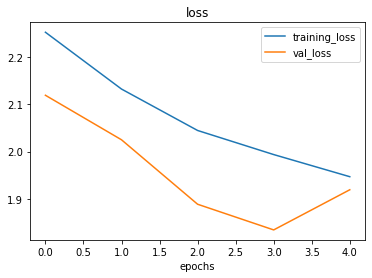

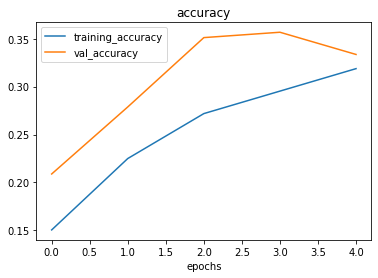

In [ ]:
# Plot training curves
plot_loss_curves(history_13)

Our model has improved after training it with augmented data

2. Simplify the model

In [ ]:
# Let's try to remove 2 Conv2D layers
model_14 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation="softmax")
])

model_14.compile(loss="categorical_crossentropy",
                 optimizer=Adam(),
                 metrics=["accuracy"])

history_14 = model_14.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 125s 529ms/step - loss: 2.2162 - accuracy: 0.1965 - val_loss: 2.0168 - val_accuracy: 0.2752
Epoch 2/5
235/235 [==============================] - 122s 520ms/step - loss: 2.0552 - accuracy: 0.2669 - val_loss: 1.9170 - val_accuracy: 0.3224
Epoch 3/5
235/235 [==============================] - 122s 518ms/step - loss: 2.0030 - accuracy: 0.2937 - val_loss: 1.8746 - val_accuracy: 0.3404
Epoch 4/5
235/235 [==============================] - 120s 509ms/step - loss: 1.9597 - accuracy: 0.3221 - val_loss: 1.8529 - val_accuracy: 0.3564
Epoch 5/5
235/235 [==============================] - 121s 513ms/step - loss: 1.9386 - accuracy: 0.3320 - val_loss: 1.8473 - val_accuracy: 0.3732


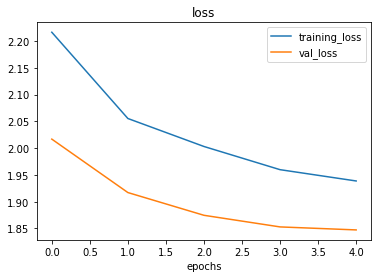

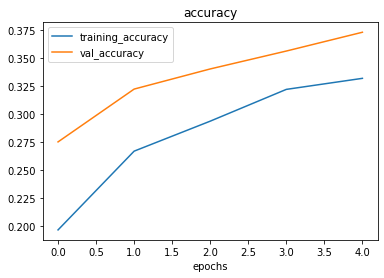

In [ ]:
# Plot training curves
plot_loss_curves(history_14)

Simplifying the model by removing Conv2D layers improves the performance of the model.

In [ ]:
evaluate_model(model_12, 12, test_data)

79/79 [==============================] - 16s 193ms/step - loss: 4.7176 - accuracy: 0.2544
Model loss on model 12: 4.7175726890563965
Model accuracy on model 12: 25.44%


In [ ]:
evaluate_model(model_13, 13, test_data)

79/79 [==============================] - 17s 219ms/step - loss: 1.9192 - accuracy: 0.3336
Model loss on model 13: 1.919192910194397
Model accuracy on model 13: 33.36%


In [ ]:
evaluate_model(model_14, 14, test_data)

79/79 [==============================] - 15s 191ms/step - loss: 1.7495 - accuracy: 0.4056
Model loss on model 14: 1.7494544982910156
Model accuracy on model 14: 40.56%


### 7. Repeat until satisfied

Ways to improve the validation / test accuracy and to bring our loss curves coser together:

* restructuring our model's architecture (increasing layers / hidden units)
* adjust the learning rate
* try different methods of data augmentation (adjust the hyperparameters in our ImageDataGenerator instance)
* training for longer (e.g. 10 epochs instead of 5 epochs)
* **try transfer learning**

### Making a prediction with our trained model

In [ ]:
# Download some custom images
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

--2022-04-19 10:40:03--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3564285 (3.4M) [image/jpeg]
Saving to: ‘03-hamburger.jpeg’

03-hamburger.jpeg   100%[===================>]   3.40M  --.-KB/s    in 0.08s   

2022-04-19 10:40:04 (40.1 MB/s) - ‘03-hamburger.jpeg’ saved [3564285/3564285]

--2022-04-19 10:40:04--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting res

In [ ]:
# Reconfig pred_and_plot function to work with multi-class images
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model and plot the image with the predicted class as the title.
  """

  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediciton
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Add in logic for multi-class
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

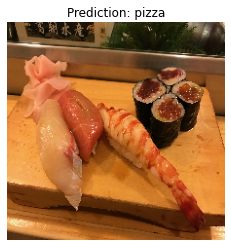

In [ ]:
# Make a prediction using model_14
pred_and_plot(model=model_14, 
              filename="03-sushi.jpeg",
              class_names=class_names)

Looks like our model didn't perform very well on our custom image, but this is because it only achieved ~37% accuracy on the test data. So, we can expect it to function quite poorly on other unseen data.

## Saving and loading our model

In [ ]:
# Save a model
model_14.save("saved_trained_model_14")

INFO:tensorflow:Assets written to: saved_trained_model_14/assets


In [ ]:
# Load in a trained model and evaluate it
loaded_model_14 = tf.keras.models.load_model("saved_trained_model_14")
loaded_model_14.evaluate(test_data)

79/79 [==============================] - 18s 223ms/step - loss: 1.7495 - accuracy: 0.4056


[1.7494542598724365, 0.40560001134872437]

In [ ]:
# Compare our loaded model to our existing model
model_14.evaluate(test_data)

79/79 [==============================] - 12s 148ms/step - loss: 1.7495 - accuracy: 0.4056


[1.749454140663147, 0.40560001134872437]

# Exercises

Find the ideal learning rate for a simple CNN model on your the 10 class dataset

In [ ]:
# Use model_14 to find ideal learning rate
model_15 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation="softmax")
])

model_15.compile(loss="categorical_crossentropy",
                 optimizer=Adam(),
                 metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

history_15 = model_15.fit(train_data_augmented,
                          epochs=40,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data),
                          callbacks=[lr_scheduler])

Epoch 1/40
235/235 [==============================] - 121s 511ms/step - loss: 2.1602 - accuracy: 0.2255 - val_loss: 1.9409 - val_accuracy: 0.3232 - lr: 0.0010
Epoch 2/40
235/235 [==============================] - 119s 507ms/step - loss: 2.0349 - accuracy: 0.2840 - val_loss: 1.8757 - val_accuracy: 0.3476 - lr: 0.0011
Epoch 3/40
235/235 [==============================] - 119s 508ms/step - loss: 1.9824 - accuracy: 0.3115 - val_loss: 1.8622 - val_accuracy: 0.3640 - lr: 0.0013
Epoch 4/40
235/235 [==============================] - 119s 508ms/step - loss: 1.9406 - accuracy: 0.3304 - val_loss: 1.8891 - val_accuracy: 0.3544 - lr: 0.0014
Epoch 5/40
235/235 [==============================] - 120s 510ms/step - loss: 1.9236 - accuracy: 0.3343 - val_loss: 1.8337 - val_accuracy: 0.3908 - lr: 0.0016
Epoch 6/40
235/235 [==============================] - 120s 510ms/step - loss: 1.9081 - accuracy: 0.3423 - val_loss: 1.7968 - val_accuracy: 0.3952 - lr: 0.0018
Epoch 7/40
235/235 [==========================

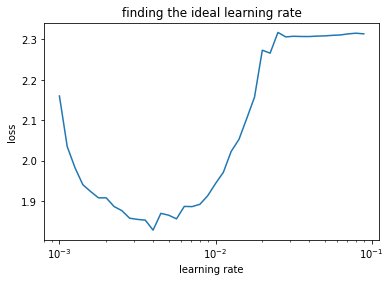

In [ ]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, history_15.history["loss"])
plt.xlabel("learning rate")
plt.ylabel("loss")
plt.title("finding the ideal learning rate");

Based on the graph, ideal learning rate is at around 0.0040

In [ ]:
# Recreate model 14 but with lr = 0.0040
model_16 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation="softmax")
])

model_16.compile(loss="categorical_crossentropy",
                 optimizer=Adam(learning_rate=0.0040),
                 metrics=["accuracy"])

history_16 = model_16.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 125s 530ms/step - loss: 2.2811 - accuracy: 0.1621 - val_loss: 2.1544 - val_accuracy: 0.2120
Epoch 2/5
235/235 [==============================] - 125s 531ms/step - loss: 2.1646 - accuracy: 0.2169 - val_loss: 2.0464 - val_accuracy: 0.2652
Epoch 3/5
235/235 [==============================] - 124s 528ms/step - loss: 2.1066 - accuracy: 0.2415 - val_loss: 2.0243 - val_accuracy: 0.2788
Epoch 4/5
235/235 [==============================] - 124s 528ms/step - loss: 2.0841 - accuracy: 0.2579 - val_loss: 1.9700 - val_accuracy: 0.3064
Epoch 5/5
235/235 [==============================] - 122s 519ms/step - loss: 2.0627 - accuracy: 0.2683 - val_loss: 1.9572 - val_accuracy: 0.3328


In [ ]:
# Evaluate model_16
evaluate_model(model_16, 16, test_data)

79/79 [==============================] - 12s 152ms/step - loss: 1.9572 - accuracy: 0.3328
Model loss on model 16: 1.9572054147720337
Model accuracy on model 16: 33.28%


In [ ]:
# Compare it with model_14
evaluate_model(model_14, 14, test_data)

79/79 [==============================] - 12s 155ms/step - loss: 1.8473 - accuracy: 0.3732
Model loss on model 14: 1.8472750186920166
Model accuracy on model 14: 37.32%


At learning rate = 0.0040, `model_16` is still not performing as well as `model_14` which has a default learning rate of 0.010. `model_14` is still the best performing model at this stage.